In [1]:
import warnings
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# source
# https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

In [2]:
data = sm.datasets.co2.load_pandas()
y = data.data
print(y)
print(type(y))

co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4
...           ...
2001-12-01  370.3
2001-12-08  370.8
2001-12-15  371.2
2001-12-22  371.3
2001-12-29  371.5

[2284 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [3]:
y = y['co2'].resample('MS').mean()
y = y.fillna(y.bfill())
print(y)
print(type(y))

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64
<class 'pandas.core.series.Series'>


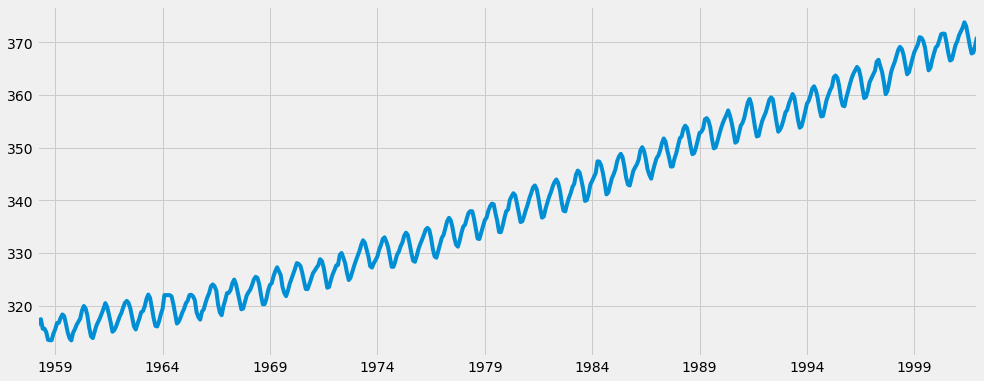

In [4]:
y.plot(figsize=(15,6))
plt.show()

In [5]:
# define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p,d,q))

# generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX : {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX : {} x {}'.format(pdq[2], seasonal_pdq[2]))
print('SARIMAX : {} x {}'.format(pdq[3], seasonal_pdq[3]))
print('SARIMAX : {} x {}'.format(pdq[4], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX : (0, 0, 1) x (0, 0, 1, 12)
SARIMAX : (0, 1, 0) x (0, 1, 0, 12)
SARIMAX : (0, 1, 1) x (0, 1, 1, 12)
SARIMAX : (1, 0, 0) x (1, 0, 0, 12)


In [6]:
warnings.filterwarnings('ignore')

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('AREMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

AREMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7612.583429881011
AREMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624036737
AREMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1854.828234141261
AREMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.7111727641156
AREMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320026
AREMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878350086824
AREMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.657897774086
AREMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647913337166
AREMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.04875494035
AREMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662327416359
AREMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941066979707
AREMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.417471676608
AREMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1095.3311709016261
AREMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:877.8605680388748
AREMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893619993
AREMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912988525697
AREMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1675.8086923024293
AREMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194094
AR

In [7]:
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3179      0.092      3.443      0.001       0.137       0.499
ma.L1         -0.6255      0.076     -8.177      0.000      -0.775      -0.476
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8766      0.026    -33.753      0.000      -0.927      -0.826
sigma2         0.0971      0.004     22.638      0.000       0.089       0.106


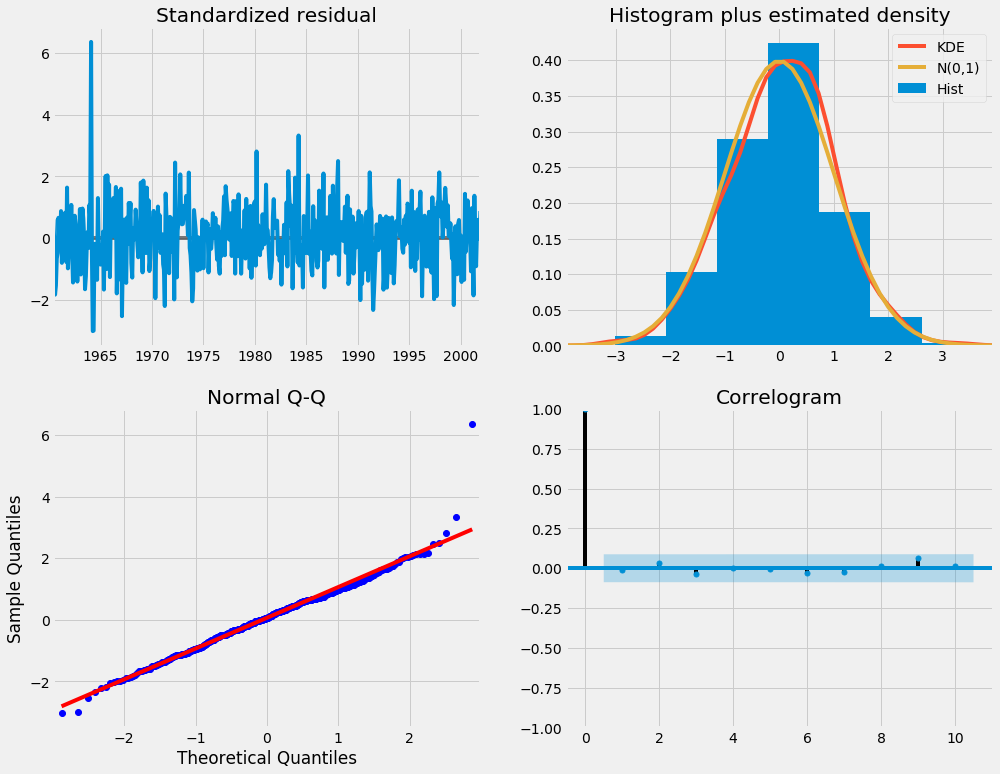

In [8]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

In [9]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

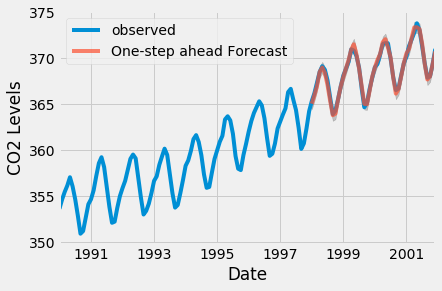

In [10]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

In [11]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]
# compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of out forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of out forecasts is 0.07


In [12]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

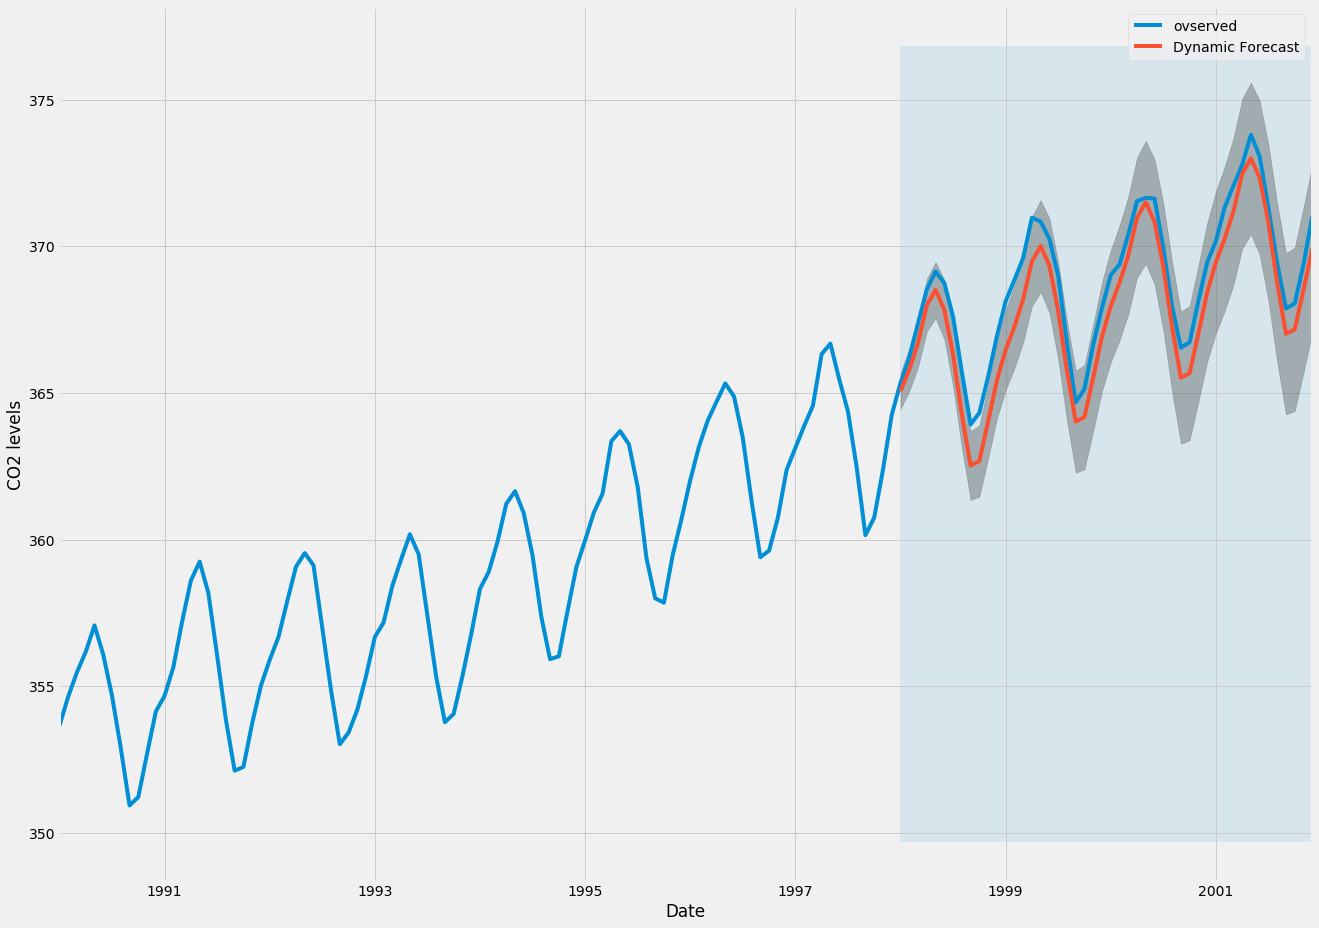

In [13]:
ax = y['1990':].plot(label='ovserved', figsize=(20,15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:,0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=0.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1], alpha=0.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 levels')
plt.legend()
plt.show()

In [14]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]
# compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.01


In [15]:
# get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)
# get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

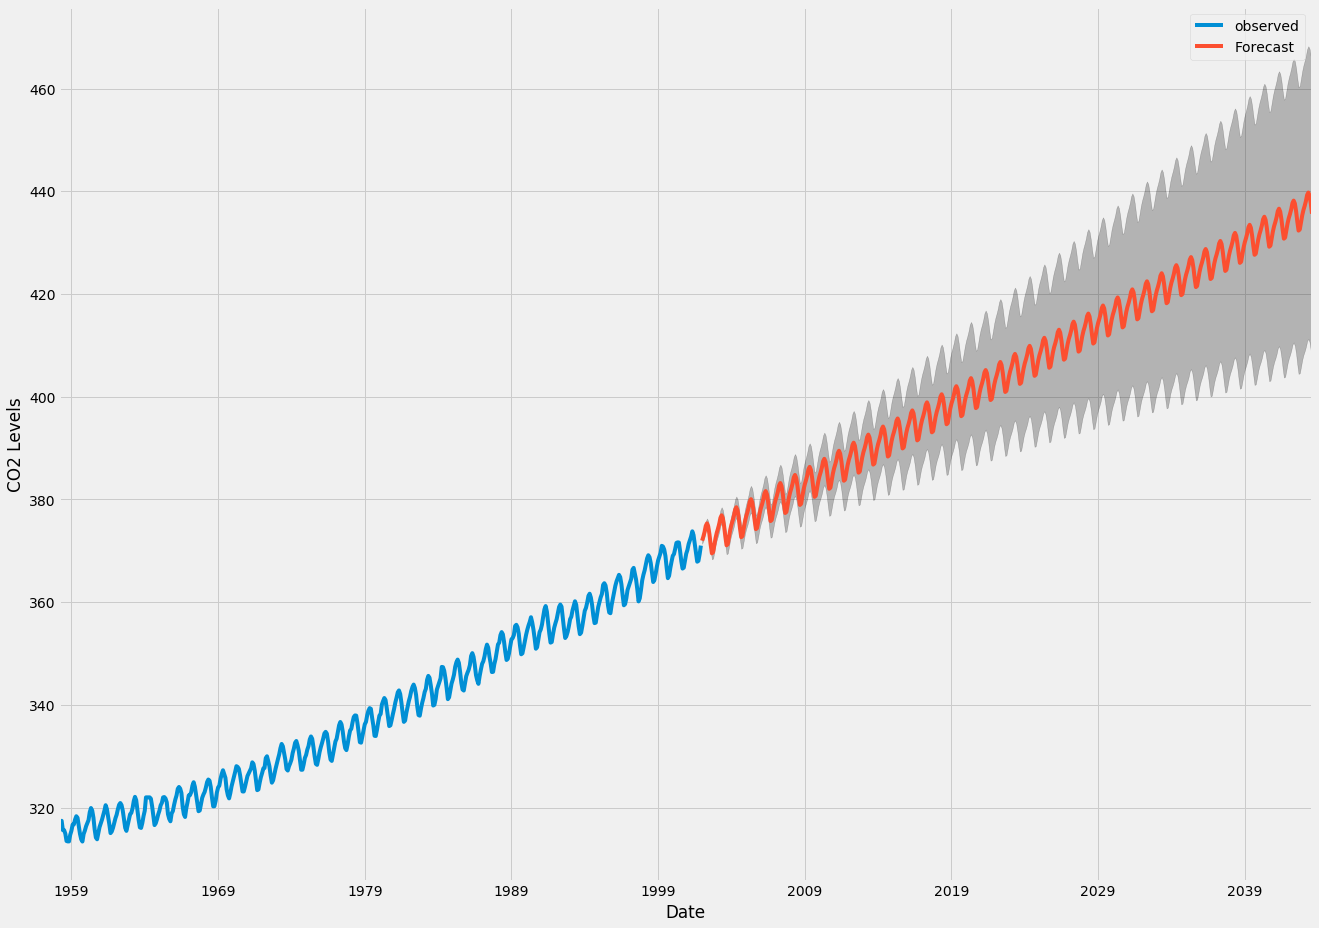

In [16]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()